# Colocate graphs

graphing the top-20 colocates for feminism across decades, but only the ones that show up more than once across each decade period (otherwise it gets too cluttered)

In [16]:
import pandas as pd

In [55]:
# import the pre-processed csv file 
df = pd.read_csv('data/col_all_feminism.csv')

In [56]:
n_top_ranked = 20
top_sources = df[df["decade"] == df["decade"].max()].nsmallest(n_top_ranked, "rank")

# rank = rank
# source = colocate
# ed_name = decade grouping

In [57]:
top_sources['colocate']

15       ('radical', 'feminism')
16          ('wave', 'feminism')
17    ('secondwave', 'feminism')
18          ('rise', 'feminism')
19        ('modern', 'feminism')
20          ('feminism', 'dead')
21         ('brand', 'feminism')
22       ('feminism', 'marxism')
Name: colocate, dtype: object

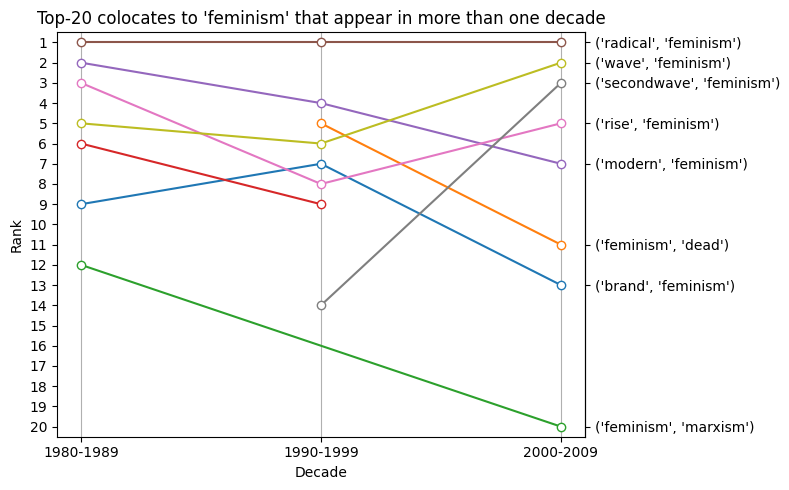

In [58]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(ylim=(0.5, 0.5 + n_top_ranked)))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

yax2 = ax.secondary_yaxis("right")
yax2.yaxis.set_major_locator(FixedLocator(top_sources["rank"].to_list()))
yax2.yaxis.set_major_formatter(FixedFormatter(top_sources['colocate'].to_list()))

for i, j in df.groupby("colocate"):
    ax.plot("decade", "rank", "o-", data=j, mfc="w")

ax.invert_yaxis()
ax.set(xlabel="Decade", ylabel="Rank", title="Top-20 colocates to 'feminism' that appear in more than one decade")
ax.grid(axis="x")

# squad = ['1980-1989','1990-1999','2000-2009']
# ax.set_xticklabels(squad, minor=False, rotation=45)

plt.tight_layout()